In [1]:
import numpy as np
import tensorflow as tf
import sklearn
import sklearn.linear_model
import sklearn.neural_network
import matplotlib.pyplot as plt
import time 
import torch

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

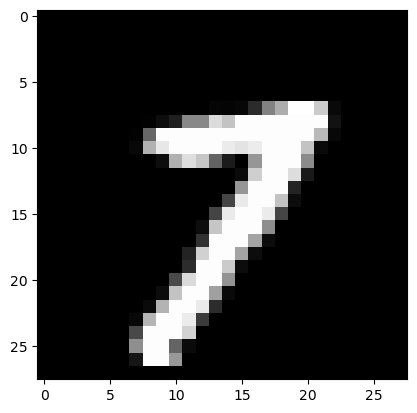

In [40]:
plt.imshow(x_train[40000], cmap='gray');

In [6]:
x_train.max(), x_train.min()

(255, 0)

In [7]:
x_train = x_train / 255.
x_test = x_test / 255.

Flatten images into vectors

In [8]:
x_trainf = x_train.reshape(-1, 28*28)
x_testf = x_test.reshape(-1, 28*28)

## Baseline: linear classifier

In [9]:
lr = sklearn.linear_model.LogisticRegression(solver='saga', tol=0.1)
lr = lr.fit(x_trainf, y_train)

In [10]:
print(f'train: {lr.score(x_trainf, y_train)}')
print(f'test: {lr.score(x_testf, y_test)}')

train: 0.92975
test: 0.9246


In [11]:
y_pred_train = lr.predict(x_trainf)
y_pred_test = lr.predict(x_testf)

In [12]:
np.sum(y_pred_test == y_test) / y_test.shape[0]

0.9246

In [13]:
np.sum(y_pred_train == y_train) / y_train.shape[0]

0.92975

## MLP in sklearn

In [14]:
net_skl = sklearn.neural_network.MLPClassifier(
    hidden_layer_sizes=(128, ), activation='relu', solver='sgd',
    tol=1e-2, max_iter=100,
    early_stopping=True
)
net_skl = net_skl.fit(x_trainf, y_train)

In [15]:
print(f'train: {net_skl.score(x_trainf, y_train)}')
print(f'test: {net_skl.score(x_testf, y_test)}')

train: 0.9169833333333334
test: 0.9218


In [16]:
net_skl = sklearn.neural_network.MLPClassifier(
    hidden_layer_sizes=(128, 128, ), activation='relu', solver='sgd',
    tol=1e-2, max_iter=100,
    early_stopping=True
)
net_skl = net_skl.fit(x_trainf, y_train)

In [17]:
print(f'train: {net_skl.score(x_trainf, y_train)}')
print(f'test: {net_skl.score(x_testf, y_test)}')

train: 0.9294
test: 0.9313


## MLP in keras

In [18]:
y_trainv = tf.keras.utils.to_categorical(y_train)
y_testv = tf.keras.utils.to_categorical(y_test)

In [ ]:
net_ker = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(28 * 28,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
net_ker.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss='categorical_crossentropy',
    metrics=['mse', 'accuracy']
)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='mse', patience=20)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

In [20]:
history = net_ker.fit(
    x_trainf, y_trainv,
    batch_size=128,
    epochs=20,
    validation_data=(x_testf, y_testv),
    callbacks=[early_stopping_callback, tensorboard_callback],
)

Epoch 1/20


2024-05-13 12:13:51.263791: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


469/469 [==============================] - 8s 17ms/step - loss: 0.2482 - mse: 0.0113 - accuracy: 0.9254 - val_loss: 0.1610 - val_mse: 0.0078 - val_accuracy: 0.9489
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0935 - mse: 0.0044 - accuracy: 0.9711 - val_loss: 0.0833 - val_mse: 0.0039 - val_accuracy: 0.9747
Epoch 3/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0635 - mse: 0.0030 - accuracy: 0.9812 - val_loss: 0.0755 - val_mse: 0.0036 - val_accuracy: 0.9768
Epoch 4/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0463 - mse: 0.0022 - accuracy: 0.9856 - val_loss: 0.0737 - val_mse: 0.0032 - val_accuracy: 0.9794
Epoch 5/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0355 - mse: 0.0017 - accuracy: 0.9887 - val_loss: 0.0758 - val_mse: 0.0035 - val_accuracy: 0.9775
Epoch 6/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0280 - mse: 0.0014 - accuracy: 0.9909 - val_loss: 0.0855 - 

## CNN in Keras

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
x_trainc = x_train.reshape((*x_train.shape, 1))
x_testc = x_test.reshape((*x_test.shape, 1))
x_trainc.shape, x_testc.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [23]:
cnn_ker = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
cnn_ker.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['mse', 'accuracy']
)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='mse', patience=20)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

In [24]:
print(cnn_ker.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               1179776   
                                                      

In [25]:
history = cnn_ker.fit(
    x_trainc, y_trainv,
    batch_size=128,
    epochs=10,
    callbacks=[early_stopping_callback, tensorboard_callback],
)

Epoch 1/10


loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<128x12x12x64xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x128x1x128xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerfor

469/469 [==============================] - 10s 21ms/step - loss: 0.2034 - mse: 0.0090 - accuracy: 0.9391
Epoch 2/10
  1/469 [..............................] - ETA: 10s - loss: 0.0681 - mse: 0.0034 - accuracy: 0.9766

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<96x12x12x64xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x96x1x128xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/0032d1ee-80fd-11ee-8227-6aecfccc70fe/Library/Caches/com.apple.xbs/Sources/MetalPerforma

469/469 [==============================] - 10s 20ms/step - loss: 0.0684 - mse: 0.0031 - accuracy: 0.9799
Epoch 3/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0520 - mse: 0.0024 - accuracy: 0.9845
Epoch 4/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0415 - mse: 0.0019 - accuracy: 0.9872
Epoch 5/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0368 - mse: 0.0017 - accuracy: 0.9887
Epoch 6/10
469/469 [==============================] - 10s 20ms/step - loss: 0.0333 - mse: 0.0015 - accuracy: 0.9900
Epoch 7/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0296 - mse: 0.0014 - accuracy: 0.9910
Epoch 8/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0276 - mse: 0.0013 - accuracy: 0.9919
Epoch 9/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0257 - mse: 0.0012 - accuracy: 0.9924
Epoch 10/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0257 - m

## MLP in PyTorch

In [26]:
x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [27]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.Y)

    def __getitem__(self,index):
        X = self.X[index].float().reshape(-1)  # flatten input to 1D
        Y = self.Y[index].long()
        return X,Y

In [28]:
num_workers = 8 if torch.cuda.is_available() else 0 

if torch.cuda.is_available():
    loader_args = dict(shuffle=True, batch_size=256, num_workers=num_workers, pin_memory=True)
else:
    loader_args = dict(shuffle=True, batch_size=64)

train_dataset = MyDataset(x_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, **loader_args)

test_dataset = MyDataset(x_test, y_test)
test_loader = torch.utils.data.DataLoader(test_dataset, **loader_args)

In [29]:
class SimpleMLP(torch.nn.Module):
    def __init__(self, size_list):
        super(SimpleMLP, self).__init__()
        self.size_list = size_list
        layers = []
        for i in range(len(size_list) - 2):
            layers.append(torch.nn.Linear(size_list[i], size_list[i+1]))
            layers.append(torch.nn.ReLU())
        layers.append(torch.nn.Linear(size_list[-2], size_list[-1]))
        self.net = torch.nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

Alternatively, you can use a similar syntax to Keras, using the `torch.nn.Sequential` class directly (less flexible, but more concise code):

In [30]:
# net = torch.nn.Sequential(
#     torch.nn.Linear(32,128),
#     torch.nn.Sigmoid(),
#     torch.nn.Linear(128,10)
# )

In [31]:
model = SimpleMLP([784, 256, 10])
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # mps
model.to(device)
print(model)

SimpleMLP(
  (net): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=10, bias=True)
  )
)


In [32]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [33]:
def train_epoch(model, train_loader, criterion, optimizer):
    model.train()

    running_loss = 0.0
    
    start_time = time.time()
    for batch_idx, (data, target) in enumerate(train_loader):   
        optimizer.zero_grad()   # .backward() accumulates gradients
        data = data.to(device)
        target = target.to(device) # all data & model on same device

        outputs = model(data)
        loss = criterion(outputs, target)
        running_loss += loss.item()

        loss.backward()
        optimizer.step()
    
    end_time = time.time()
    
    running_loss /= len(train_loader)
    print('Training Loss: ', running_loss, 'Time: ',end_time - start_time, 's')
    return running_loss

In [34]:
def test_model(model, test_loader, criterion):
    with torch.no_grad():
        model.eval()

        running_loss = 0.0
        total_predictions = 0.0
        correct_predictions = 0.0

        for batch_idx, (data, target) in enumerate(test_loader):   
            data = data.to(device)
            target = target.to(device)

            outputs = model(data)

            _, predicted = torch.max(outputs.data, 1)
            total_predictions += target.size(0)
            correct_predictions += (predicted == target).sum().item()

            loss = criterion(outputs, target).detach()
            running_loss += loss.item()

        running_loss /= len(test_loader)
        acc = (correct_predictions/total_predictions)*100.0
        print('Testing Loss: ', running_loss)
        print('Testing Accuracy: ', acc, '%')
        return running_loss, acc

In [35]:
n_epochs = 10
Train_loss = []
Test_loss = []
Test_acc = []

for i in range(n_epochs):
    train_loss = train_epoch(model, train_loader, criterion, optimizer)
    test_loss, test_acc = test_model(model, test_loader, criterion)
    Train_loss.append(train_loss)
    Test_loss.append(test_loss)
    Test_acc.append(test_acc)
    print('='*20)

Training Loss:  0.30055577286493296 Time:  1.5794861316680908 s
Testing Loss:  0.1558351881066515
Testing Accuracy:  95.25 %
Training Loss:  0.12722818173968525 Time:  1.5442121028900146 s
Testing Loss:  0.09947338892491
Testing Accuracy:  96.89 %
Training Loss:  0.08383600274299476 Time:  1.5244948863983154 s
Testing Loss:  0.08484882850105026
Testing Accuracy:  97.3 %
Training Loss:  0.06067873206215976 Time:  1.5405359268188477 s
Testing Loss:  0.0748838320238053
Testing Accuracy:  97.64 %
Training Loss:  0.04563170118999085 Time:  1.551332712173462 s
Testing Loss:  0.07311532071607697
Testing Accuracy:  97.69 %
Training Loss:  0.03482410960509551 Time:  1.5795707702636719 s
Testing Loss:  0.06859174194808006
Testing Accuracy:  97.87 %
Training Loss:  0.027874083903522345 Time:  1.5456409454345703 s
Testing Loss:  0.0738099695637134
Testing Accuracy:  97.72999999999999 %
Training Loss:  0.021041945922799083 Time:  1.5657978057861328 s
Testing Loss:  0.06561093809673338
Testing Accur

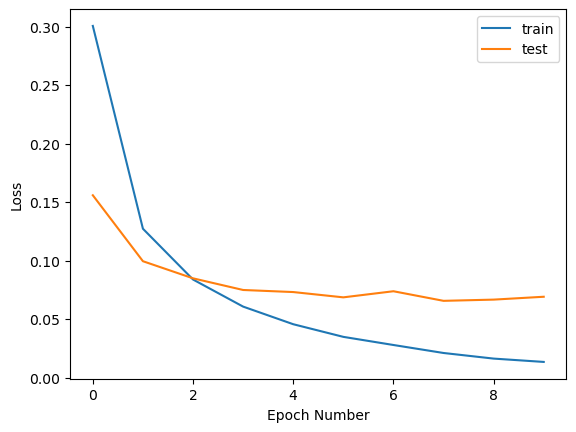

In [36]:
# plt.title('Training Loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(Train_loss, label='train')
plt.plot(Test_loss, label='test')
plt.legend();

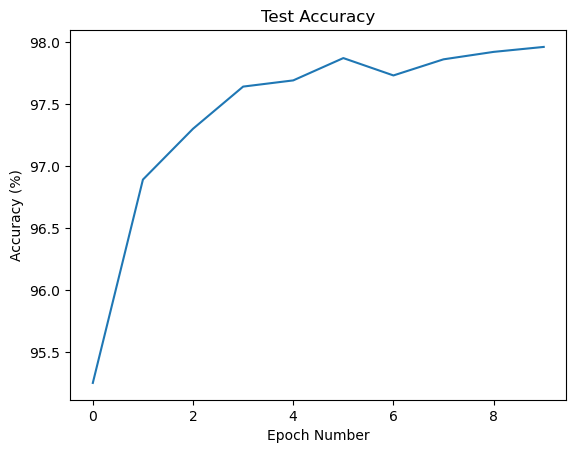

In [37]:
plt.title('Test Accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy (%)')
plt.plot(Test_acc);